## Bessel's Correction (Motivation)

How do we estimate the variance of a random variable by operating on observations?

First attempt:

$$ \hat{\sigma^2}_{bias} = \frac{1}{N}\sum_i (x_i - \bar{x})^2 $$

where $\bar{x}$ is the sample mean.  Lets see how this works out for us...

## Building a ground truth distribution:

In practice, we don't usually have access to ground truth.  But to help ourselves study, lets build a toy example with known ground truth variance.  

In [1]:
import numpy as np

# a fair 6 sided die
outcomes = np.array([1, 2, 3, 4, 5, 6])
prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [2]:
# compute exp_value & variance
truth_exp_val = np.dot(outcomes, prob)
truth_var = np.dot(outcomes ** 2, prob) - truth_exp_val**2
truth_var

2.916666666666666

## Lets "roll" the die N times and estimate the variance from our observations:

In [3]:
from random import choices

N = 3

observations = choices(outcomes, prob, k=N)
observations

[5, 3, 3]

In [4]:
# compute sample mean, our estimate of expected value
est_exp_val = sum(observations) / N
est_exp_val

3.6666666666666665

In the cell below:

`est_var_bias` = $$ \hat{\sigma^2}_{bias} = \frac{1}{N}\sum_i (x_i - \bar{x})^2 $$

In [5]:
# compute biased variance estimator
est_var_bias = sum((np.array(observations) - est_exp_val)**2) / N
est_var_bias

0.8888888888888888

## Maybe its just unlucky in these first few examples that our estimate variance was often lower than ground truth ... lets repeat that a whole bunch:

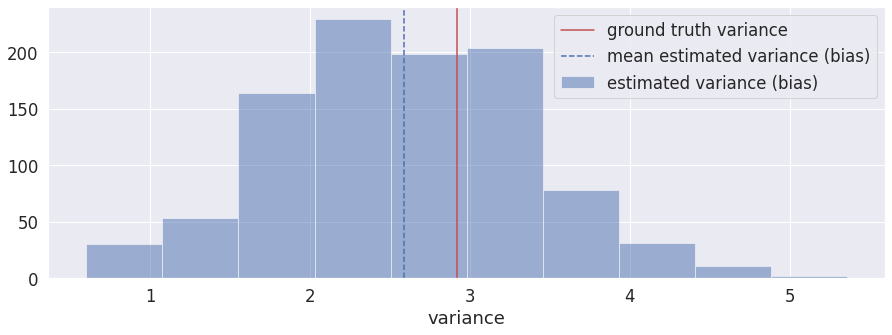

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

outcomes = np.array([1, 2, 3, 4, 5, 6])
prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

n_repeats = 1000
N = 10

# compute exp_value & variance
truth_exp_val = np.dot(outcomes, prob)
truth_var = np.dot(outcomes ** 2, prob) - truth_exp_val**2
truth_var

list_est_var = list()
for _ in range(n_repeats):
    # draw observations
    observations = choices(outcomes, prob, k=N)
    
    # compute sampel mean (needed to compute est_var_bias)
    est_exp_val = sum(observations) / N
    
    # compute biased variance estimate
    est_var = sum((np.array(observations) - est_exp_val)**2) / N
    
    # store
    list_est_var.append(est_var_bias)
    

sns.set(font_scale=1.5)
plt.hist(list_est_var_bias, label='estimated variance (bias)', alpha=.5)
plt.axvline(truth_var, label='ground truth variance', color='r')
plt.axvline(np.mean(list_est_var_bias), label='mean estimated variance (bias)', color='b', linestyle='--')
plt.xlabel('variance')
plt.legend()
plt.gcf().set_size_inches(15, 5)

# Punchline:

$$ \hat{\sigma^2}_{bias} = \frac{1}{N}\sum_i (x_i - \bar{x})^2 $$

consistently under estimates our variance.  We'll soon see that:

$$ \hat{\sigma^2}_{bessel} = \frac{1}{N-1}\sum_i (x_i - \bar{x})^2 $$

on average, doesn't over or underestimate variance.